In [ ]:
%%capture
!pip install smote-variants
!pip install imbalanced_databases
!pip install -U imbalanced-learn

# Please Note that the PkMaker_Data.csv has to be imported before

# Author
Benjamin M.\
University of Rostock.\

# Abstract
With the help of machine learning, we are able to solve classification problems with a high degree of certainty. However, this becomes difficult as soon as we want to solve such problems of imbalanced datasets. To increase the accuracy of the classification problems with respect to imbalanced datasets, we can use the oversampling algorithms Borderline-SMOTE and CURE SMOTE. This case study will analyze three models consisting of the random forest algorithm or the k-nearest neighbor algorithm. Using these algorithms to predict the class and evaluate the outcome with the help of the 5x5 fold stratified cross validation method. Helping to achieve a significant increase in accuracy with respect to the minority class.

This report is intended not only to show how to handle imbalanced datasets in respect to Borderline-SMOTE and CURE SMOTE, but also explore the surroundings of it and give beginners an introduction to machine learning.



# Keywords
Borderline-SMOTE, CURE SMOTE, Imbalanced datasets, Machine Learning

# Introduction
With the expansion of machine learning, coupled with the arrival of the big data era, class imbalance is becoming a more prominent issue when we want to predict the minority classes of such data sets, the minority-class being the underrepresented part of the dataset and the majority-class being overrepresented. Particularly where there is a large disproportion between the majority and minority class. For it is the rareness of the minority class that is important, often carrying valuable knowledge (Krawczyk, 2016). For example, in bioinformatics, determining if a person has cancer.

However, working with an imbalanced dataset poses a classification predictive modelling problem, where the distribution of examples across the classes are not equal. This is an issue as many machine learning algorithms used for classification are created under the assumption that all classes in the dataset are equal in quantity (Brownlee, 2019a). And so it would be inappropriate to train algorithms where a dataset has a severe class imbalance, as the minority class would be underrepresented. Creating bias towards the majority class.

Nowadays a plethora of methods can be used, but we will focus on the data-level methods to approach the problem of learning from imbalanced datasets. The data-level methods modify the quantity of classes to be equal, or remove difficult samples. An algorithm that tackles this problem is known as the Synthetic Minority Oversampling Technique (SMOTE). Allowing minority class data to be scaled to an equal quantity as the majority class. Therefore removing bias.
We will follow these steps:
1. Explaining the SMOTE algorithms
2. Understanding the datasets
3. Creating the models
4. Evaluating the results
5. Summary

In the following we will discuss the functionality of SMOTE. In particular, we will focus on Borderline-SMOTE, Borderline-SMOTE2 and CURE SMOTE, we will go into the construction and mathematics of these algorithms, and we will use example graphs to illustrate them. Finally, we will look at the drawbacks of these algorithms.

Secondly, we will analyze the datasets superficially to see if they need to be revised or reworked. The datasets we are working with are mammography dataset, credit card fraud dataset and the ParkourMaker dataset. This is necessary because the accuracy of the algorithms later depends strongly on their quality.

In the third section we will implement the SMOTE algorithms. We will use SMOTE, Borderline-SMOTE, Borderline-SMOTE2 and CURE SMOTE. For this we use the standard parameters and the smote_variants library. We will also explain the k-nearest neighbor and random forest classification algorithms and the 5x5 fold stratified cross validation method on a basic level. For k-nearest neighbors we will be using k=30 and for random forest classification a max_depth=2. We will go through the following scenarios with testing:
1. K-nearest neighbor algorithm trained with mammography dataset.
2. Random forest algorithm trained with credit card fraud dataset.
3. K-nearest neighbor trained with ParkourMaker dataset.
A comparison of before and after SMOTE application will be shown with the help of scatterplots.

After that we will be using three parameters to measure the performance of the three models: the F1-score, average precision score and the balanced accuracy to evaluate the models. Explaining what we have found, how it is interpreted through the published literature, and what problems or mistakes have occurred. Also mentioning what approaches could be taken to solve these issues.

Finally, we will summarize the results and draw conclusions if Borderline-SMOTE and CURE SMOTE can be used for the improvement of classifying imbalanced datasets.

# The Smote Algorithms
Imbalanced data has been a widely discussed topic over the last two decades. With one of the first methods of learning from imbalanced data relating to convergence rates of backpropagation-trained neural networks (Krawczyk, 2016).

Today there are a number of methods available for oversampling an imbalanced dataset, but the most common technique is known as the Synthetic Minority Oversampling Technique (SMOTE) (Chawla, 2010). The algorithm creates synthetic minority class samples by linear interpolation of the minority class. Drawing random samples from a line segment joined by two close-enough minority class data points. This simple but effective method alleviates overfitting caused by random oversampling, and its ease of implementation is what makes SMOTE such a popular choice (Bej, 2020).


### Construction of the Smote Algorithm
Let $min_i, min_j \ \forall i, j \in [1,n]$ be minority class data points from an imbalanced dataset C with n minority class samples.

**Step 1**:\
Choosing randomly: $min_i$, $min_j$ with $min_i \neq min_j$ and $min_j$ as  $min_i$’s nearest minority class neighbors.

**Step 2**:\
Creating a straight line between $min_i$ and $min_j$ with interval $[min_i, min_j]$ assuming that in respect to the x-axis $min_i \leq min_j$.

**Step 3**:\
Producing new samples $min_{new}$ with $u \in [0,1]$ as follows:
>$min_{new} = min_i + u(min_j − min_i)$.

**Step 4**:\
Repeating **Step 1** and generating a population of synthetic samples from the minority class (Bej, 2020).


### SMOTE Example
**Graph 1** - Image of SMOTE after application on minority class dataset.\
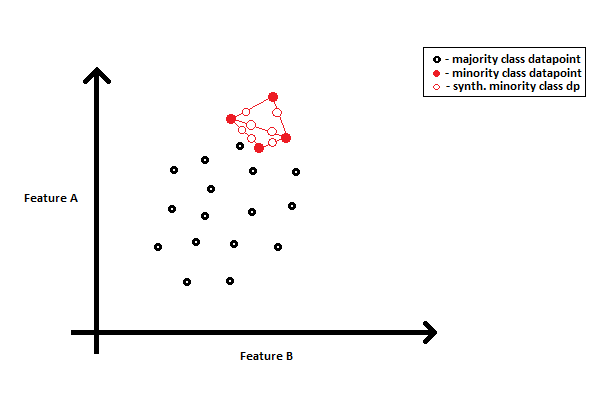\
**Graph 1** contains data point samples represented as points from an imbalanced dataset after applying SMOTE. The axis describes features A and B.

Black points represent majority class samples and red points represent minority class samples. The white points with a red outline are synthetically generated samples. This graph shows that SMOTE clusters a lot of the minority samples, enabling algorithms to better predict the minority class.

### Disadvantages of SMOTE
As SMOTE generates synthetic samples for each minority sample, this can lead to overgeneralization. SMOTE does not take neighboring examples from other classes into account, and can therefore increase the overlapping of classes, creating unnecessary noise (Paul, 2018).

Furthermore, the decision boundary that describes the area where two classes of  data points meet is often a very important, but difficult part for the classification process. (He and Garcia, 2009). To strengthen the decision boundary we will introduce a new algorithm, Borderline-SMOTE.


## Borderline SMOTE Algorithm
Minority class data points which are plotted especially close to the edges of our majority classes data points are termed as ‘borderline’ samples. The main objective of Borderline-SMOTE is to identify only these borderline minority samples, and then further use them for oversampling by linear interpolation (Shelke et al., 2017). This is useful because some ‘borderline’ samples can be particularly confusing as they may not have clear adjacent data to be compared against (Bej, 2020).

Borderline-SMOTE2 offers a similar, but slightly different approach. This algorithm does not only take into account the minority samples for the application of SMOTE, but also applies SMOTE to the borderline samples of the majority class. It uses the same algorithm as Borderline-SMOTE, except for the creation of synthetic samples with the help of interpolation between minority and majority samples. Choosing the parameter
$u\in[0,0.5]$ in order to keep the newly created samples closer to the minority class (Han et al., 2005, Bej, 2020).




### Construction of the Borderline Smote Algorithm
Let $min_i \forall i \in N$ be minority class data points from an imbalanced dataset C.\
Let $max_i \forall i \in N$ be majority class data points from an imbalanced dataset C.

**Step 1**:\
Identify borderline points by counting $min_i$’s n-nearest neighbors and determine the cardinality of $max_i$ points.
This can be done as shown here:
>Let $N_{max_i}^n(min_i)$ be the set of the n nearest majority point neighbors of $min_i$
and $\begin{align*} m(min_i) = |N^n_{max_i}(min_i)| \end{align*}$
>>*Case 1* ($m(min_i) = n$):\
$min_i$ has only majority point neighbors
and will not be included because its a noise point.

>>*Case 2* ($\frac{n}{2} \leq m(min_i) < n$):\
$min_i$ has more than 50% majority point neighbors and will be a borderline point.

>>*Case 3* ($\frac{n}{2} > m(min_i)$):\
$min_i$ has more minority point neighbors and isn't a borderline point.

**Step 2**:\
Data samples which are classified as borderline points have the SMOTE algorithm applied to them, strengthening their decision boundary.

As previously mentioned, Borderline-SMOTE2 is constructed almost identically as the Borderline-SMOTE algorithm. The additional usage of borderline samples from the majority class being the exception.


### Borderline SMOTE Example
**Graph 2** - Image of Borderline-SMOTE after appilcation on minority class dataset.

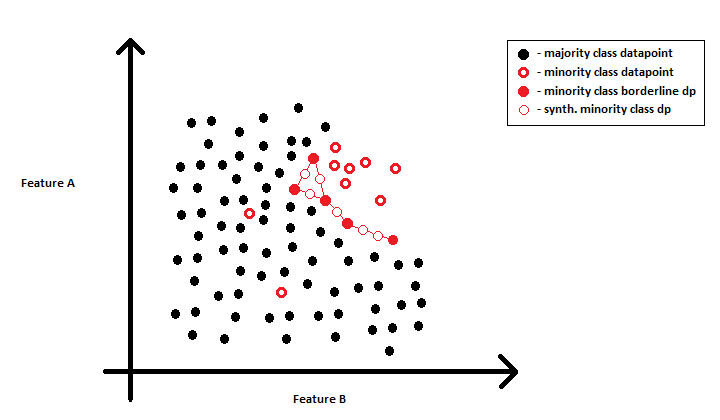

**Graph 2** shows imbalanced dataset samples after the resampling algorithm Borderline-SMOTE was applied. There are 4 types of data points, each representing one sample of the dataset. The axis describes features A and B.

Black points represent majority class samples and white points with a thick red outline represent the minority class. The red points are borderline points meant to be oversampled and white circles with a thin red border are newly created samples.

This graph shows that the decision boundary between the samples has been strengthened by these newly created synthetic borderline samples.


### Disadvantages of Borderline-SMOTE
On the other hand, Borderline-SMOTE still fails to completely reflect the distribution of the original data. Artificial samples generated by the outlying minor class samples may lead to problems such as repeatability, or noisy and unclear boundaries between the positive and negative classes (Ma and Fan, 2017). The Borderline algorithm can struggle spotting all borderline points. Or by oversampling solely borderline data points it can create overfitting of data.

But there is an algorithm that can solve these types of problems too. The CURE SMOTE algorithm is not sensitive to outliers and can recognize abnormal data points. This is important today where big data is more relevant than ever. Offering an efficient solution to oversampling large scale imbalanced data.



## CURE SMOTE Algorithm
Based on the CURE hierarchical clustering algorithm, the CURE SMOTE algorithm obtains a better classification result for imbalanced datasets, using K-means to find clusters of minority class samples to apply SMOTE to. Experiments on imbalanced data have shown that CURE SMOTE enhances the results of classification, compared to the results of applying: random sampling, Borderline-SMOTE, safe-level SMOTE. C-SMOTE and K-means-SMOTE (Ma and Fan, 2017).

The main idea of CURE SMOTE is to cluster the minority class samples, remove noise and outliers and then apply the known SMOTE algorithm on the  representative points of each cluster. The construction of the CURE SMOTE algorithm is shown below.

### The CURE algorithm
The CURE SMOTE algorithm requires the CURE algorithm beforehand. Therefor we are going to take a closer look on how the CURE algorithm works and then move on to the construction of CURE SMOTE

Using the CURE SMOTE algorithm requires knowledge about the CURE algorithm beforehand. We will first look at how the CURE algorithm functions before moving to the construction of CURE SMOTE.

The ‘clustering for representatives’ algorithm (CURE) uses a predefined amount of representative points to represent the clusters. Nearest clusters are merged together until a specific threshold amount of clusters is reached (Leskovec et al., 2016).

There are different ways to implement the CURE algorithm. One slightly different approach is described by Rajaraman where he explains a solution for the application of CURE on large datasets. They state that applying the hierarchical clustering algorithm on a randomly selected sample of the data is done beforehand. With remaining data sorted afterwards, in dependence on their distance to the representative points for each cluster. This is helpful when dealing with large quantities of data, which are not able to be loaded into the main memory (Leskovec et al., 2016).

However, for this case study we will look at how Ma and Fan implement the CURE algorithm. Their approach is almost identical, differing by using all minority class samples for the cluster building (Ma and Fan, 2017).

**Construction of the CURE algorithm**

**Step 1**.\
Let $X$ be a normalised dataset.
Initialy each point $p$ in $X$ is considered a cluster. Each cluster has a a set of points $U$, a set of representive points $U_r$ and a central point $U_c$.

The distance between two clusters U,V is defined as:
>$min(U,V) = min_{p\in U, q\in V}dist(p,q)$\
Meaning it is the minimum distance between two representative points.

**Step 2**.\
Decide on a clustering number $c$ and a represenative number $r$. When the number of cluster-centres reaches $c$ the algorithm terminates. If a cluster has more than r representatives, then new representetive points have to be chosen.

**Step 3**.\
Merge the two clusters with the smallest $min(U,V)$. Update $U_r$ and $U_c$ as follows:
>$U_c = \frac{|U|*U_c + |V|*V_c}{|U|+|V|}$, calculating the new centerpoint.\
$U_r \leftarrow \{p + \alpha*(U_c - p) | p \in U_r\}$, move all representative points $(100*\alpha)$% closer to the centerpoint.

It is suggested to choose $\alpha$ = 0.5.
If the representative points after a merge are higher than defined, new representative points are selected. This happens by choosing one random representative point and choosing the next one as far away as its former, within its cluster.

**Step 3** is repeated until the clustering number c is reached. The class with the slowest growth speed will be removed (Ma and Fan, 2017).

### Construction of the CURE SMOTE Algorithm
The algorithm now oversamples with the help of SMOTE every generated cluster. It does that by interpolating between a point of the cluster and the representative points of said cluster.

**Step 4.**\
Let $X^n_{cluster}$ be the n-th cluster with $n \in [1,n]$\
Let $U^n_r$ be a representative point from the n-th cluster\
Generating new samples by chosing random points from $X^n_{cluster}$:
>$X^n_{new} = \bigcup_{x\in X^n_{cluster}} x + u(U_r^n-x)$

**Step 5.**\
Combining the newly generated samples with $X_{os}$ being the oversampled minority class:
>$X_{os} = \bigcup_{n\in [1,n]} (X^n_{new} \cup X^n_{cluster})$

In the clustering process, noisy points have to be removed. When clustering is complete, small clusters will also be removed.

Interpolation of our sample points after clustering effectively prevents generalization and preserves the original distribution of the data set. By using the interpolation formula, samples are only generated between representative samples and the samples in the original minor class. Avoiding influence from boundary points.

This implementation of clustering with merge operations eliminates the noise points at the end of the process. Simplifying the process as there is no need to eliminate farthest generated artificial samples after the SMOTE algorithm.

In addition, all termination criteria, such as: reaching pre-set number of clusters, the number of representative points or the distance threshold are reducing the instability of the proposed algorithm (Ma and Fan, 2017).

### CURE Example
**Graph 3** - Plot of a dataset after applying the CURE algorithm.\
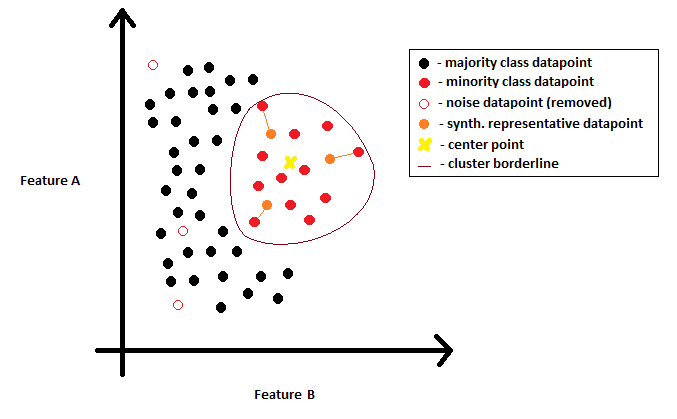\
**Graph 3** shows an imbalanced dataset after the application of the CURE algorithm. There are 4 types of data points, each representing one sample of the dataset. The axis describes features A and B.

Black and red points represent the majority and minority classes respectively. White points with a thin red border are outliers removed from CURE, and orange points describe the representatives of that cluster. As the orange line shows, these have been shifted towards the yellow center point.

The brown line surrounding everything is the borderline of the cluster, including all samples that count towards the cluster found by CURE.

### CURE SMOTE Example
**Graph 4** - Plot of a dataset after applying the CURE SMOTE algorithm.\
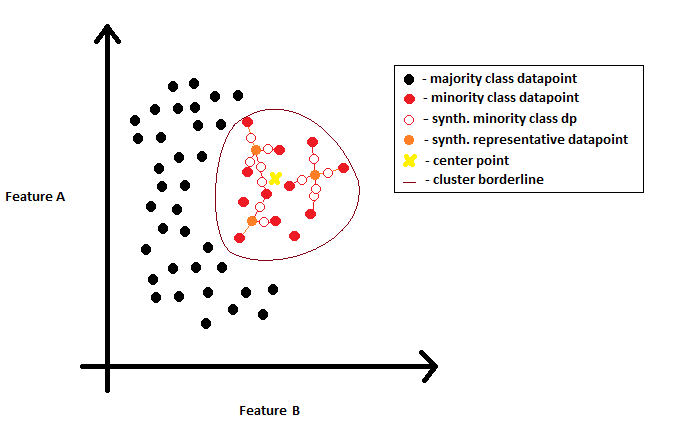\
**Graph 4** shows an imbalanced dataset after the application of SMOTE onto an existing clustered CURE plot. There are 4 types of data points, each representing one sample of the dataset. The axis describes features A and B.

Black and red points represent the majority and minority classes respectively. White points with a thin red border are now the synthetic minority class data points, and orange points describe the representatives of that cluster. It is now visible how the SMOTE algorithm creates new synthetic samples between the representative points and randomly selected data points.

Also seeing that CURE SMOTE has created many additional data points surrounding the yellow center and the synthetic representative data points.


# Import Libraries

In [ ]:
# Import needed Libraries
import smote_variants as sv
from imblearn.datasets import fetch_datasets
import imbalanced_databases as imbd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tabulate
from IPython.display import HTML, display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, average_precision_score, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix

# A look at datasets
With the theory behind and the different SMOTE algorithm variants covered, we will now focus on the datasets that we will analyze. This is a mandatory step in the process of understanding the datasets, which will help us in preprocessing the data for the application of SMOTE.

This case study will look at three different imbalanced datasets. The mammography dataset, credit card fraud dataset and a private ParkourMaker dataset. By using multiple datasets we can diversify how we apply the SMOTE algorithm, resulting in a more accurate and versatile analysis.

Firstly we will understand what named datasets followed by looking at the samples inside each dataset, visualising this with tables. For the unique, private ParkourMaker dataset we will also be using a plot to better understand it.



## 1. Mammography Dataset
The mammography dataset is a dataset which contains data on radiological scans detecting breast cancer. Specifically the presence of clusters of microcalcifications that appear bright on a mammogram.

The mammography dataset is a popular choice for imbalanced classification due to its severe class imbalance. 98% of the classes are labeled as microcalcifications (‘having no cancer’) and the remaining 2% are samples having cancer (Brownlee, 2020a and Woods et al., 1993).


In [ ]:
# Loading Dataset
fetch_mam = fetch_datasets()['mammography']

# Creating the pandas dataframe and naming columns 'V1' to 'V6'
df_mam = pd.DataFrame(np.c_[fetch_mam['data'], fetch_mam['target']], columns=['V1','V2','V3','V4','V5','V6','Class'])

# Changing -1 to 0 in dataframe
df_mam['Class'] = df_mam['Class'].replace(-1, 0)

# Show the first 5 entires of the dataset
print("Table 1 - First 5 samples of the mammography dataset")
df_mam.head(5)

Table 1 - First 5 samples of the mammography dataset


,V1,V2,V3,V4,V5,V6,Class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0.0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0.0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0.0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0.0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0.0


For **Table 1** the values have already been scaled down. The features of this dataset are explained as follows.\
The features of this dataset are explained as follows.
*   V1 - Area of object (in pixels).
*   V2 - Average gray level of the object.
*   V3 - Gradient strength of the object’s perimeter pixels.
*   V4 - Root mean square noise fluctuation in the object.
*   V5 - Contrast, average gray level of the object minus the average of a two-pixel wide border surrounding the object.
*   V6 - A low order moment based on shape descriptor.
*   Class - shows if a person has breastcancer:
>(1) has cancer\
>(0) has no cancer

(Brownlee, 2021 and Kevin Woods et al., 1993)


In [ ]:
# Showing different information about the dataset
print("Amount of samples:                 ", len(df_mam))
print("Amount of marjority class samples: ", len(df_mam[df_mam['Class']==0]))
print("Amount of minority class samples:  ", len(df_mam[df_mam['Class']==1]))
print("Percentage of minorty classes:     ", round(100*(len(df_mam[df_mam['Class']==1])/len(df_mam)), 3),"%")

Amount of samples:                  11183
Amount of marjority class samples:  10923
Amount of minority class samples:   260
Percentage of minorty classes:      2.325 %


As the output above shows we have a total of 11183 samples, divided as 10923 majority class samples and 260 minority class samples. Resulting in a minority class distribution of 2.325% and therefore a severe class imbalance as stated above.

## 2. Credit card fraud dataset
The credit card fraud dataset contains transactions made by Mastercards in September 2013 by European cardholders. It represents 2 days of transactions and its focus is to predict fraudulent transactions (Kaggle, 2018).

In [ ]:
df_cred = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

print("Table 2 - First 5 samples of the credit card fraud dataset")

# Dropping 90% of the dataset randomly, otherwise it would be way too big to use
df_cred = df_cred.drop(df_cred.sample(frac=.9).index)

# Show the first 5 entires of a few features from the dataset
df_cred[['Time','V1','V2','V27','V28','Amount','Class']].head(5)

Table 2 - First 5 samples of the credit card fraud dataset


,Time,V1,V2,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,0.062723,0.061458,123.50,0
29,23.0,1.059387,-0.175319,0.081461,0.024220,12.99,0
35,26.0,-0.535388,0.865268,-0.078306,0.025427,1.77,0


**Table 2** shows that the dataset contains 30 features. 28 of those are principal components obtained with PCA (Principal Component Analysis) regarding the issue of personal information. The 2 unchanged features are ‘time’ and ‘amount’.

Time represents the time which has passed since the first transaction. Amount represents the amount of money in the transaction. The class states whether a transaction was fraudulent (1) or not (0).


In [ ]:
# Removing the time feature since it is not relevant.
df_cred = df_cred.drop(columns="Time")

In [ ]:
# Showing different information about the dataset
print("Amount of samples:                    ", len(df_cred))
print("Amount of minority class samples:     ", len(df_cred[df_cred['Class']==0]))
print("Amount of majority class samples:     ", len(df_cred[df_cred['Class']==1]))
# Showing distribution between classes
print("Percentage of minorty classes:        ", round(100*(len(df_cred[df_cred['Class']==1])/len(df_cred)), 3),"%")

Amount of samples:                     28481
Amount of minority class samples:      28435
Amount of majority class samples:      46
Percentage of minorty classes:         0.162 %


As the outputs above show, we have a total of 28481 samples, divided as 28446 majority class samples and 54 minority class samples. That's a minority class distribution of 0.123% and therefore a severe class imbalance as stated above.

## 3. Parkour-Maker Dataset
The ParkourMaker dataset is a collection of data from the video game Minecraft. Specifically, player world data, collected from a small server called Project Omega. These Minecraft worlds inside their server are known as ‘parkour courses’ (Mojang, 2009).

Players are able to edit and upload their own courses to the server library, where others can search for their course, then play and rate it. The best courses receive the special status of "Featured Course". The purpose of this dataset is to predict if a course is feature worthy or not.


In [ ]:
%%capture
# Setting up DataFrame Pk-Data
df_pk = pd.read_csv('./sample_data/PkMaker_Data.csv')
indexc = list(range(0,21461))

# Adding an index to the dataframe
df_pk['index'] = indexc
df_pk.set_index(['index'])

# Selecting only those courses that are released since others have -1 or null values for most columns
df_pk = df_pk[df_pk['isReleased']==1]

# Removing samples with >20000 average fails (noise points)
df_pk = df_pk[df_pk['AverageFails']<20000]

# Removing unneccessary features
drop_features = ['ID', 'BestTime', 'AverageTime', 'OriginalSize','CachedPlayerName','UUID','FileID','Name','Generator','Environment'
                  ,'StartLocation','DisplayItem','isPremium'
                  ,'isVerifying','SuccessfulPlays','v1_8','v1_9','v1_13'
                  ,'OpenDoors','SpecialBlocks','AlwaysSprint','NoSprint'
                  ,'NoJump','NoSneak','DamageEnabled','DamageNoDamage'
                  ,'ResetDamage','ResetWater','ResetLava','DisableSpectator'
                  ,'DisableSavestate', 'isReleased', 'isVerified', 'TimeReleased','index']

df_pk = df_pk.drop(drop_features, axis=1)

# Removing samples that got less then 5 total ratings (noise points)
df_pk = df_pk[df_pk['TotalRatings']>5]

# checking for invalid entries
df_pk.info()

# -> everything fine, no changes needed

In [ ]:
# Show the first 5 entires ofthe now remaining dataset
print("Table 3 - First 5 samples of the parkour maker dataset")
df_pk.head(5)

Table 3 - First 5 samples of the parkour maker dataset


,UniquePlays,SuccessRate,AverageFails,TotalRatings,AverageRating,isFeatured
0,577,0.9428,1.0352,120,3.7830,0
1,495,0.9556,0.0000,98,2.8776,0
3,258,0.9341,0.0095,54,3.3890,0
5,145,0.5931,1.2791,32,2.9687,0
9,98,0.3571,9.5427,12,3.9167,0


We are now left with the most important features of that dataset.

*   UniquePlays - unique players which played the course
*   SuccessRate - average percentage of players passing a course
*   AverageFails - average percentage of fails a player has in a course
*   TotalRatings - unique number of ratings a course recieved
*   AverageRating - average rating from 0-5, where 0 is worst, 5 best
*   isFeauted - shows if a course is featured
>(1) is featured\
>(0) is not featured


In [ ]:
# describing the values we are interested in
print("Table 4 - Furhter description of selected features from parkour maker dataset")
df_pk[['UniquePlays', 'SuccessRate', 'TotalRatings', 'AverageRating', 'isFeatured']].describe()

Table 4 - Furhter description of selected features from parkour maker dataset


,UniquePlays,SuccessRate,TotalRatings,AverageRating,isFeatured
count,9703.000000,9703.000000,9703.000000,9703.000000,9703.000000
mean,136.120375,0.530823,20.039885,3.630211,0.015253
std,82.225905,0.263242,14.177438,0.724725,0.122564
min,14.000000,0.011800,6.000000,0.250000,0.000000
25%,91.000000,0.307200,11.000000,3.208250,0.000000
50%,122.000000,0.517500,17.000000,3.714300,0.000000
75%,161.000000,0.750000,26.000000,4.142800,0.000000
max,3467.000000,1.000000,609.000000,5.000000,1.000000


**Table 4** includes 9703 samples. With the average unique plays for a course being 136 plays, the average completion rate is 53% and the average course rating is 3.6 out of 5.0. But most importantly, the dataset is heavily imbalanced with only 1.5% of all courses featured.

### Example Plot

Plot 1 - Relation between average rating and success rate per person


Text(0, 0.5, 'average rating')

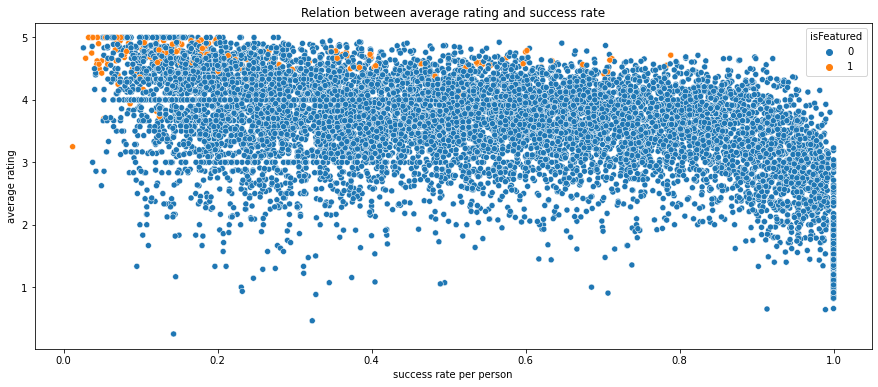

In [ ]:
# Drawing a plot of the pk dataset
print("Plot 1 - Relation between average rating and success rate per person")
plt.figure(figsize=(15,6))
plt.title("Relation between average rating and success rate")
sns.scatterplot(data=df_pk, x="SuccessRate", y="AverageRating", hue="isFeatured")
plt.xlabel("success rate per person")
plt.ylabel("average rating")

**Plot 1** shows the relation between the orange feature points distributed and the relation between average rating and success rate. On average featured courses have a very good rating of 4.5 to 5.0. But are also harder in difficulty, shown by the general 0.1 - 0.3 success rate per person of featured maps.

# Oversampling with SMOTE
Now that we understand the basics of the SMOTE algorithms and datasets, they can be implemented.

## Splitting the datasets
First, each of the datasets will be divided into the features X, and the class y which will be predicted. Moreover, the new datasets will then be put into arrays for ease of access in the future.

In [ ]:
# Defining X as feature-array and y as class-array
X_mam, y_mam = np.array(df_mam.drop('Class', axis=1)), np.array(df_mam['Class'])
X_cred, y_cred = np.array(df_cred.drop('Class', axis=1)), np.array(df_cred['Class'])
X_pk, y_pk = np.array(df_pk.drop('isFeatured', axis=1)), np.array(df_pk['isFeatured'])

# Saving the datasets into arrays
X_data_arr, y_data_arr = [X_mam, X_cred ,X_pk], [y_mam, y_cred, y_pk]

## Scaling data down
Now the data is scaled down in order to avoid bias towards large values.

In [ ]:
# Initialising the scaler
scaler = StandardScaler()
X_scaled_data = []

# Using the standard scaler to scale down large values
for i in range(3):
  scaler.fit(X_data_arr[i])
  scaledData = scaler.transform(X_data_arr[i])
  X_scaled_data.append(scaledData)

## Initialising the SMOTE algorithms
The previously imported SMOTE algorithms are now initialised from smote_variants.

In [ ]:
%%capture
# Initializing the borderline1, borderline2 and CURE SMOTE algorithms
smotesampler = sv.SMOTE()
borderline1sampler = sv.Borderline_SMOTE1()
borderline2sampler = sv.Borderline_SMOTE2()
curesampler = sv.CURE_SMOTE()
sampler_list = [smotesampler, borderline1sampler, borderline2sampler, curesampler]

# Creating list with names of the datasets
name_arr = ["Normal Dataset", "Smote Dataset", "Borderline1 Dataset", "Borderline2 Dataset", "CURE SMOTE"]
length = len(name_arr)

## The Stratified Cross Validation
To estimate the results of the algorithms, the stratified cross validation technique will be implemented. This is an effective method of evaluating machine learning models with limited data as it resamples already existing data into equally sized groups (Brownlee, 2018). Iterating through all groups and choosing one to be the test data, and the rest train data.

By using cross validation it creates a more versatile approach. By using many different combinations of train and test groups, the end result will be more robust, and less random. However, there is one major disadvantage: the extra computational time (Schneider, 1997). This method takes k-times longer since models have to be trained k times.


### Setting up Stratified Cross Validation
For this process we will choose n=5 splits with the datasets being shuffled beforehand with a random_state of 1.

In [ ]:
# Setting up the stratified cross validation algorithm
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

## K-nearest neighbors algorithm trained with mammography dataset
The k-nearest neighbor algorithm is a simple, yet effective technique as it doesn’t require any training and is fairly easy to understand. This algorithm can be used for both classification and regression problems, but it will only be used for classification here.

When a prediction is made, the algorithm checks the k-nearest neighbors based on their euclidean distance to the data point being checked. After discovering all k-nearest neighbors, the algorithm then classifies the data point to the average class of these neighbors (Brownlee, 2019b).

Unfortunately, the k-nearest neighbor algorithm also comes with its own disadvantages. It is sensitive to scaling and to irrelevant features. On top of being dependent on the quality of data and being ineffective with high dimensionality (Soni, 2020).


### Initialising the knn classifier
The knn classifier is now initialised with n = 30. In addition, the scaled mammography data will be loaded and then a score list created for later obtained algorithm evaluation scores.


In [ ]:
# Setting up the classifier for k-nearest neighbors
classifier_kn = KNeighborsClassifier(n_neighbors=30)

X_mam_scaled = X_scaled_data[0]

# Initialising an array to save values to
score_list_mam = [[],[],[]]
oversample_save = [[0,0],[0,0],[0,0],[0,0],[0,0]]

### Applying the SMOTE variants on the mammography dataset
Now the data will be split as described above. In doing so training of the knn classifier and prediction using the test data can begin.

It is especially important to note that the oversampling process happens after the splitting. Otherwise we would test the algorithm with synthetic samples. This is not good since it could happen that copies of the same point end up in both training and test sets, allowing the algorithm to cheat (S. Wagner, 2013).

The accuracy of this, is evaluated with the f1-score, the average precision score and the balanced accuracy.

In [ ]:
# Repeating the 5 fold cross validation five times
for i in range(5):

  print("Now starting: ", name_arr[i])
  f1scoretotal, AVPscoretotal, BAscoretotal = 0, 0, 0

  # Splitting up the datasets into training data and test data
  for train_index, test_index in kf.split(X_mam, y_mam):

    X_train, X_test = X_mam[train_index], X_mam[test_index]
    y_train, y_test = y_mam[train_index], y_mam[test_index]

    # Oversampling the training data only
    if i is not 0:
      X_train, y_train = sampler_list[i-1].sample(X_train, y_train)

    # saving one training sample for later comparison
    oversample_save[i][0] = X_train
    oversample_save[i][1] = y_train

    # Training the kn algorithm with the training data
    classifier_kn.fit(X_train, y_train)

    # Trying to predict the values from the test data
    y_pred = classifier_kn.predict(X_test)

    # Calculating f1score, average precision and balanced accuracy
    f1score = f1_score(y_pred=y_pred,y_true=y_test)
    f1scoretotal = f1score + f1scoretotal

    AVPscore = average_precision_score(y_score=y_pred,y_true=y_test)
    AVPscoretotal = AVPscore + AVPscoretotal

    BAscore = balanced_accuracy_score(y_pred=y_pred,y_true=y_test)
    BAscoretotal = BAscore + BAscoretotal

  # Saving the calculated values as averages in an array for later access
  score_list_mam[0].append(round((f1scoretotal/5),3))
  score_list_mam[1].append(round((AVPscoretotal/5),3))
  score_list_mam[2].append(round((BAscoretotal/5),3))

### Example graphs before and after applying SMOTE on mammography dataset
Plots are always good for getting an idea of how the data got changed.

In [ ]:
def generateScatterPlot(ax, f_mam, X, y, title, xlabelName, ylabelName):
  counter = Counter(y)

  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    ax.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    ax.set_title(title)
    ax.set_xlabel(xlabelName)
    ax.set_ylabel(ylabelName)

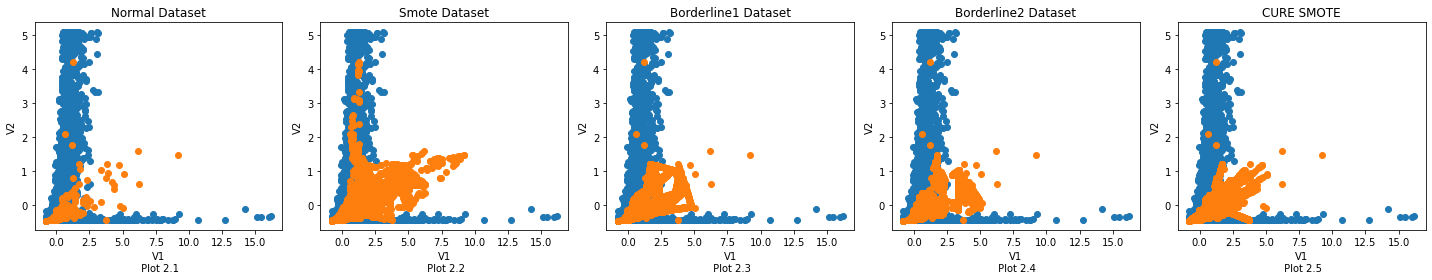

In [ ]:
# Setting up subplots so the plots are next to eachother
f_mam, ax_mam = plt.subplots(1,5,figsize=(20,4))

# Iterating through all 5 training datasets and generating the plots accordingly
for i in range(5):
  X_mam_samp = oversample_save[i][0]
  y_mam_samp = oversample_save[i][1]
  label_cap = ''.join(['V1\n Plot 2.',str(i+1)])
  generateScatterPlot(ax_mam[i], f_mam, X_mam_samp, y_mam_samp, name_arr[i], label_cap, 'V2')

f_mam.tight_layout()

All of the above plots describe the features V1 and V2

**Plot 2.1** describes the unchanged dataset.  It shows that a small minority cluster was formed in $x\in[0,5]$ and $y\in[0,2]$.

**Plot 2.2** describes the dataset after applying SMOTE, showing that the minority-cluster has expanded towards the x-axis with $x$ values up to 10. The minority class has also grown on the y-axis to $y = 4.5$

**Plot 2.3** and **Plot 2.4** show the dataset after applying Borderline-SMOTE and Borderline-SMOTE2. Particularly around the area $x=5$ the minority class has been strengthened.

**Plot 2.5** shows the data after applying CURE SMOTE. A really dense minority-cluster was formed around $x\in[0,3]$ and $y\in[0,1]$, meaning the center has been strengthened.

## Random forest algorithm trained with credit card fraud dataset
The random forest algorithm is an easy to use option for classification and regression problems. It is robust to outliers, efficient on big data and effective on linear data.

The algorithm consists of several, highly varied decision trees. Each decision inside a tree is based on the greedy method, which always decides on the best possible choice of that iteration (Trehan, 2020).

An oversimplified random forest algorithm can be explained as data that is predicted going through all trees. Each tree classifies the data, and then the average of this classification is calculated. Based on this, the classification is made (Brownlee, 2020b).


### Initialising the rf classifier
When setting up the rf classifier, notice that the max_depth=2. This is necessary due to an otherwise very high training time.

In [ ]:
# Setting up the classifier for the random forest algorithm
classifier_rf = RandomForestClassifier(max_depth=2, random_state=1)

X_cred_scaled = X_scaled_data[1]

# Initialising an array to save values to
score_list_cred = [[],[],[]]

### Applying the SMOTE variants on the credit card fraud dataset
We are doing the exact same approach as explained above.

In [ ]:
# Repeating the 5 fold cross validation five times
for i in range(5):

  print("Now starting: ", name_arr[i])
  f1scoretotal, AVPscoretotal, BAscoretotal = 0, 0, 0

  # Splitting up the datasets into training data and test data
  for train_index, test_index in kf.split(X_cred_scaled, y_cred):

    X_train_2, X_test_2 = X_cred_scaled[train_index], X_cred_scaled[test_index]
    y_train_2, y_test_2 = y_cred[train_index], y_cred[test_index]

    # Oversampling the training data only
    if i is not 0:
      X_train_2, y_train_2 = sampler_list[i-1].sample(X_train_2, y_train_2)

    # saving one training sample for later comparison
    oversample_save[i][0] = X_train_2
    oversample_save[i][1] = y_train_2

    # Training the rf algorithm with the oversampled training data
    classifier_rf.fit(X_train_2, y_train_2)

    # Trying to predict the values from the test data
    y_pred_2 = classifier_rf.predict(X_test_2)

    # Calculating f1score, average precision and balanced accuracy
    f1score = f1_score(y_test_2,y_pred_2)
    f1scoretotal = f1score + f1scoretotal

    AVPscore = average_precision_score(y_test_2,y_pred_2)
    AVPscoretotal = AVPscore + AVPscoretotal

    BAscore = balanced_accuracy_score(y_test_2,y_pred_2)
    BAscoretotal = BAscore + BAscoretotal

  # Saving the calculated values as averages in an array for later access
  score_list_cred[0].append(round((f1scoretotal/5),3))
  score_list_cred[1].append(round((AVPscoretotal/5),3))
  score_list_cred[2].append(round((BAscoretotal/5),3))

### Example graphs before and after applying SMOTE on credit card fraud dataset

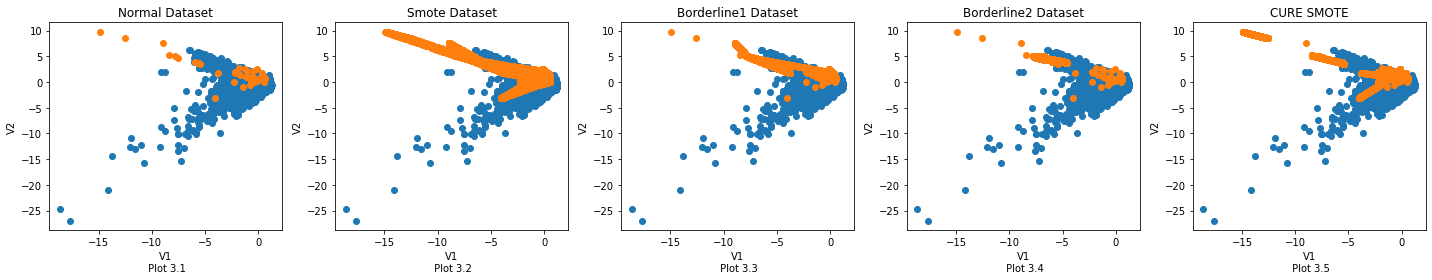

In [ ]:
# Setting up subplots so the plots are next to eachother
f_cred, ax_cred = plt.subplots(1,5,figsize=(20,4))

# Iterating through all 4 SMOTE algorithms and generating the plots accordingly
for i in range(5):
  X_cred_samp = oversample_save[i][0]
  y_cred_samp = oversample_save[i][1]
  label_cap = ''.join(['V1\n Plot 3.',str(i+1)])
  generateScatterPlot(ax_cred[i], f_cred, X_cred_samp, y_cred_samp, name_arr[i], label_cap, 'V2')

f_cred.tight_layout()

The five plots displayed above showcase the original credit card fraud dataset and the datasets with SMOTE applied on them. The x-axis displays the V1 values and the y-axis displays the V2 values.

**Plot 3.1** is our original dataset, seeing that there is a somewhat minority class cluster in the top right corner.

**Plots 3.2 - 3.5** showcase an almost evolutionary process. Becoming more precise with the creation of minority class clusters.

At the beginning of this evolution, **Plot 3.2** has only a single, wide minority cluster pointing in one direction. Whereas by evolution, **Plot 3.5** has many small minority clusters pointing into several directions.

## K-nearest neighbor trained with ParkourMaker dataset
The parkour dataset will be evaluated with the k-nearest neighbor algorithm. An identical procedure as the other aforementioned datasets.

### Setting up knn classifier
Setting up a new knn classifier.

In [ ]:
# Setting up the classifier for the random forest algorithm
# classifier_rf_pk = RandomForestClassifier(max_depth=2, random_state=1)
classifier_kn_pk = KNeighborsClassifier(n_neighbors=30)

### Applying the SMOTE variants on the ParkourMaker dataset

In [ ]:
X_pk_scaled = X_scaled_data[2]

# Initialising an array to save values to
score_list_pk = [[],[],[]]

for i in range(5):

  print("Now starting: ", name_arr[i])
  f1scoretotal, AVPscoretotal, BAscoretotal = 0, 0, 0


  # Splitting up the datasets into training data and test data
  for train_index, test_index in kf.split(X_pk_scaled, y_pk):

    X_train_3, X_test_3 = X_pk_scaled[train_index], X_pk_scaled[test_index]
    y_train_3, y_test_3 = y_pk[train_index], y_pk[test_index]

    # Oversampling the training data only
    if i is not 0:
      X_train_3, y_train_3 = sampler_list[i-1].sample(X_train_3, y_train_3)

    # saving one training sample for later comparison
    oversample_save[i][0] = X_train_3
    oversample_save[i][1] = y_train_3

    # Training the rf algorithm with the oversampled training data
    classifier_kn_pk.fit(X_train_3, y_train_3)

    # Trying to predict the values from the test data
    y_pred_3 = classifier_kn_pk.predict(X_test_3)

    # Calculating f1score, average precision and balanced accuracy
    f1score = f1_score(y_test_3,y_pred_3)
    f1scoretotal = f1score + f1scoretotal

    AVPscore = average_precision_score(y_test_3,y_pred_3)
    AVPscoretotal = AVPscore + AVPscoretotal

    BAscore = balanced_accuracy_score(y_test_3,y_pred_3)
    BAscoretotal = BAscore + BAscoretotal

  # Saving the calculated values as averages in an array for later access
  score_list_pk[0].append(round((f1scoretotal/5),3))
  score_list_pk[1].append(round((AVPscoretotal/5),3))
  score_list_pk[2].append(round((BAscoretotal/5),3))

### Example graphs before and after applying SMOTE on ParkourMaker dataset

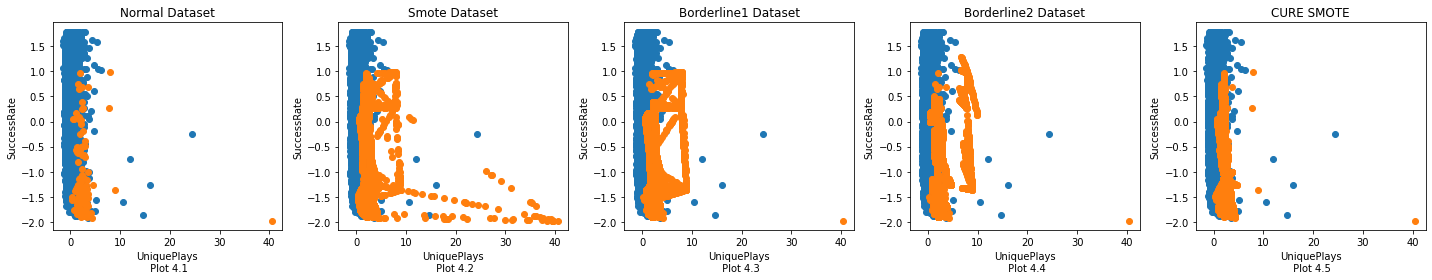

In [ ]:
# Setting up subplots so the plots are next to eachother
f_pk, ax_pk = plt.subplots(1,5,figsize=(20,4))

# Iterating through all 4 SMOTE algorithms and generating the plots accordingly
for i in range(5):
  X_pk_samp = oversample_save[i][0]
  y_pk_samp = oversample_save[i][1]
  label_cap = ''.join(['UniquePlays\n Plot 4.',str(i+1)])
  generateScatterPlot(ax_pk[i], f_pk, X_pk_samp, y_pk_samp, name_arr[i], label_cap, 'SuccessRate')

f_pk.tight_layout()

**Plots 4.1 - 4.5** above describe the results of applying the oversampling variants. The x-axis shows unique plays and the y-axis the success rate.



# Evaluating and analysing the results
The following part will take a close look at the results of our analysis. We will be checking if the application of SMOTE onto imbalanced datasets is a valid solution for better classification, and will also try to evaluate errors and mistakes. These errors and mistakes will then be drawn into a conclusion. To evaluate this, the F1-score, average precision (AP) and balanced accuracy (BA) will be used.

The F1 score is defined as a weighted average of the precision and recall. It reaches its best value at 1 and its worst value at 0 (sklearn).
\
F1 is calculated as follows:
>$F1 = 2 * \frac{(precision * recall)}{(precision + recall)}$

AP summarizes the precision-recall curve. It gets calculated as the weighted mean of precisions achieved at each threshold. The increase in recall from the previous threshold is used as the weight (sklearn). It is calculated as follows:
>$AP = \sum_n(R_n-R_{n-1})*P_n$\
>$R_n$: precision at the nth threshold\
>$P_n$: recall at nth treshold

The balanced accuracy is defined as the average of recall obtained on each class (sklearn).


In [ ]:
def generateBarPlot(ax, mam, cred, pk, title, i):
  # data to plot
  groups = 5

  # create plot
  index = np.arange(groups)
  bar_width = 0.15
  opacity = 1

  obj1 = ax.bar(index, mam, bar_width,alpha=opacity,color='b',label='mam')
  obj2 = ax.bar(index + bar_width, cred, bar_width,alpha=opacity,color='g',label='cred')
  obj3 = ax.bar(index + 2*bar_width, pk, bar_width,alpha=opacity,color='r',label='pk')

  stringlabel = label_cap = ''.join(['Datasets\nPlot 5.',str(i+1)])

  ax.set_xlabel(stringlabel)
  ax.set_ylabel('Scores in %')
  ax.set_title(title)
  ax.set_xticklabels(['', 'Normal', 'Smote', 'Bord1', 'Bord2', 'Cure'])
  ax.legend()

In [ ]:
# Generating the plots for the different scores to compare them
# f, ax = plt.subplots(1,3,figsize=(14,6))
# generateBarPlot(ax[0], score_list_mam[0], score_list_cred[0], score_list_pk[0], 'F1 Scores', 0)
# generateBarPlot(ax[1], score_list_mam[1], score_list_cred[1], score_list_pk[1], 'AP Scores', 1)
# generateBarPlot(ax[2], score_list_mam[2], score_list_cred[2], score_list_pk[2], 'BA Scores', 2)
# f.tight_layout()

*Despite using preventative measures, setting a value for random_seed, after restarting the runtime of Google Collab results will vary slightly. With the restart creating a different environment for the random_seed values. Unable to find a working solution online, the code has been commented out and replaced with a picture of the current results.*

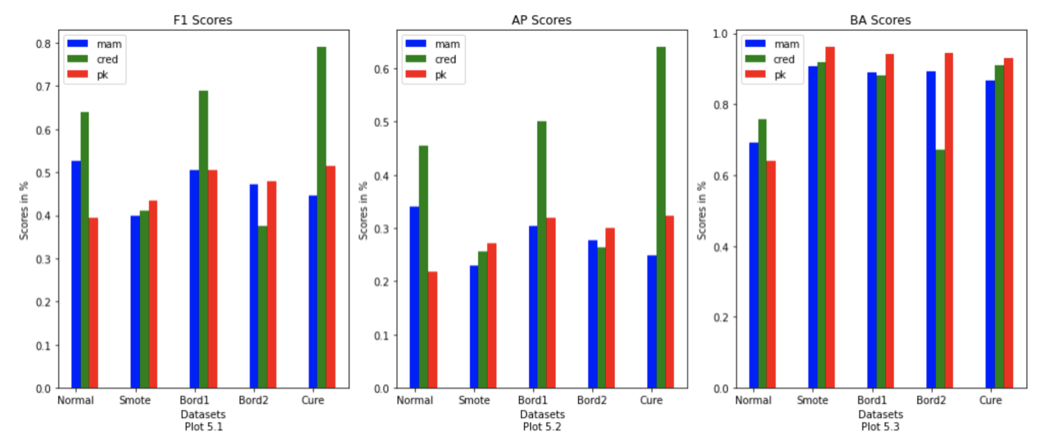

Each model in this report was evaluated using the 5x5 fold cross validation method. Accordingly, this analysis is robust with respect to randomness. The above plots are describing the results of no SMOTE application, as well as the application of SMOTE, Borderline-SMOTE, Borderline-SMOTE2 and CURE SMOTE. **Plot 5.1** shows F1 scores, **Plot 5.2** describes the AP scores and **Plot 5.3** shows the BA scores.

Our analysis starts with the mammography dataset. We trained the k-nearest neighbor algorithm using our 5 different datasets and evaluated it using the 5x5 fold stratified cross validation method. We can see that the F1 scores as well as the AP scores have all fallen below the original value of 0.55, with Borderline-SMOTE coming the closest to the original value. Yet this is not necessarily a bad thing, with our BA scores increasing from 70% to 90%, with only Borderline-SMOTE2 falling below the original value from before. Concluding that the accuracy of our majority class predictions has decreased, but that of the minority class has increased significantly. Therefore when deciding on one algorithm for the mammography dataset, it is not necessary to choose one specific SMOTE algorithm. Due to the small variance of the F1-score, AP and BA values.

However, we can observe a change in the credit card fraud dataset. Specifically after the application of the algorithm Borderline-SMOTE and CURE SMOTE we were able to achieve above average values after training with the random forest algorithm. The CURE SMOTE algorithm achieved an increase of almost 0.2 in all three scores, as well as the Borderline-SMOTE algorithm increasing by 0.05 in all three scores. Compared to the other models, this is an impressive improvement and can conclude that the Borderline-SMOTE and CURE SMOTE datasets, in combination with the random forest algorithm have harmonized particularly well.

The CURE SMOTE algorithm has a 0.8 F1-score and 0.7 AP score, a lot higher than that of Borderline-SMOTE. With the real danger being Borderline-SMOTE2, which should also be fully avoided due to achieving worse results than even the normal dataset when looking at F1-score, AP and BA values. Therefore, it can be said that the CURE SMOTE should be chosen when deciding on an oversampling algorithm.


The last dataset we looked at is the ParkourMaker dataset. Here we use the k-nearest neighbor algorithm for training. We can quickly see that F1 score, AP and BA values have improved slightly compared to the normal dataset. The BA score has the highest improvement with the SMOTE algorithm. But this is only a minimal difference compared to Borderline-SMOTE, Borderline-SMOTE2 and CURE SMOTE.

The analysis of Han et al. reinforces the statements made here regarding Borderline SMOTE, stating that "Experiments indicate that our methods behave better, which validates the efficiency of our methods" (Han et al., 2005). The paper by Ma and Fan also indicates that CURE SMOTE showcases significant improvement. "The training set produced from the proposed CURE SMOTE algorithm is closer to the original data distribution because it contains minimal noise. Thus, better classification results are produced from this feasible and effective algorithm." (Ma and Fan, 2017).


# Summary
In conclusion, this case study proves that oversampling with Borderline-SMOTE and CURE SMOTE offers a good solution when it comes to detecting the minority class in a severe imbalanced dataset. Although this can mostly be achieved by the cost of losing predictive value towards the majority class.

This case study also proves that of the used SMOTE algorithms in this case study, CURE SMOTE is the most effective. Harmonizing with the credit card fraud dataset. Although the Borderline-SMOTE algorithms also work well with the datasets and more effectively compared to the SMOTE algorithm, it does not compare to CURE SMOTE.

The cause for this could stem from using the random forest algorithm, which is said to handle high dimensional data well. However, the Borderline-SMOTE2 algorithm underperforms in every category and therefore would not be suggested for use here.

We can also conclude that the application of one of the SMOTE variants is heavily dependent on the quality and type of datasets. If a dataset has two clusters dividing minority and majority classes, then the use of Borderline-SMOTE may be already enough. If the dataset has minority and majority mixed classes, then CURE SMOTE is a better approach.

However, there are still many uncovered factors in this case study. Missed opportunities that might improve the predictive strength of these models that can be found in data preparation. The decision behind being better optimised. Or looking even further into more complex problems, such as why outliers were not removed from the train data after the application of CURE SMOTE. Which creates the potential for this algorithm to underperform.




# References
Bej, S. (2020) *SMOTE algorithm and its extensions*.
**University of Rostock**. [online] Available at: [Accessed: 12 December 2020].
>
Brownlee, J. (2018) *A Gentle Introduction to k-fold Cross-Validation*.
**Machine Learning Mastery**. [online] Available at: https://machinelearningmastery.com/k-fold-cross-validation/ [Accessed: 2 January 2021].
>
Brownlee, J. (2019a) *A Gentle Introduction to Imbalanced Classification*. **Machine Learning Mastery**. [online] Available at: https://machinelearningmastery.com/what-is-imbalanced-classification/ [Accessed: 2 January 2021].
 >
Brownlee, J. (2019b) *Develop K-Nearest Neighbors in Python From Scratch*.
**Machine Learning Mastery**. [online] Available at: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ [Accessed: 30 December 2020].
>
Brownlee, J. (2020a) *Imbalanced Classification Model to Detect Mammography Microcalcifications*. **Machine Learning Mastery**. [online] Available at: https://machinelearningmastery.com/imbalanced-classification-model-to-detect-microcalcifications/ [Accessed: 30 December 2020].
>
Brownlee, J. (2020b) *How to Develop a Random Forest Ensemble in Python*. **Machine Learning Mastery**. [online] Available at: https://machinelearningmastery.com/random-forest-ensemble-in-python/ [Accessed: 2 January 2021].
>
Chawla N. (2005) *Data Mining for Imbalanced Datasets: An Overview*. **Knowledge Discovery Handbook**. pp.853-867 [online] Available at: https://www.academia.edu/29405695/DATA_MINING_FOR_IMBALANCED_DATASETS_AN_OVERVIEW [Accessed: 21 December 2020].
>
Han, H. et al. (2005) *Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning*. **Tsinghua University**. pp.878-887 [online] Available at: https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf [Accessed: 12 December 2020].
>
He, H. and Garcia, E. (2009) *Learning from Imbalanced Data*. **IEEE**. Vol 21(9) pp.1263-1284. [online] Available at: https://ieeexplore.ieee.org/abstract/document/5128907 [Accessed: 28 December 2020].
>
Kaggle (2018) Credit Card Fraud Detection. [online] Available at: https://www.kaggle.com/mlg-ulb/creditcardfraud [Accessed: 3 January 2021].
>
Krawczyk, B. (2016) *Learning From Imbalanced Data: Open Challenges And Future Directions*. **Springer**. [online] Available at: https://doi.org/10.1007/s13748-016-0094-0 [Accessed: 18 December 2020].
>
Leskovec et al. (2016) Lecture 62 — *The CURE Algorithm (Advanced) | Stanford University*. **Artificial Intelligence - All In One**. [online] Available at: https://www.youtube.com/watch?v=JrOJspZ1CUw&ab_channel=ArtificialIntelligence-AllinOne [Accessed: 20 December 2021].
>
Ma, L. and Fan, S. (2017) *CURE-SMOTE algorithm and hybrid algorithm for feature selection and parameter optimization based on random forests*. **BMC Bioinformatics**. [online] Available at: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-017-1578-z  
[Accessed: 3 January 2021].
>
Mojang (2009) *Minecraft* [Video game]. Microsoft.
>
Paul, S. (2018) *Diving Deep with Imbalanced Data*.
**Datacamp**. [online] Available at: https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data [Accessed: 29 December 2020].
>
Schneider, J. (1997) *Cross Validation*. **Carnegie Mellon University**. [online] Available at: https://www.cs.cmu.edu/~schneide/tut5/node42.html#:~:text=The%20disadvantage%20of%20this%20method,training%20set%20k%20different%20times [Accessed: 5 January 2021].
>
Shelke, M. et al. (2017) *A Review on Imbalanced Data Handling Using Undersampling and Oversampling Technique*. **International Journal of Recent Trends in Engineering and Research**. Vol 3(4) pp.444-449. [online] Available: https://www.ijrter.com/papers/volume-3/issue-4/a-review-on-imbalanced-data-handling-using-undersampling-and-oversampling-technique.pdf [Accessed: 20 December 2020]
>
sklearn (no date) *average_precision_score*. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score [Accessed: 8 January 2021].
>
sklearn (no date) *balanced_accuracy*. [online] Available at:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score [Accessed: 8 January 2021].
 >
sklearn (no date) *sklearn.metrics.f1_score*. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score [Accessed: 8 January 2021].
 >
Soni, A. (2020) *Advantages and Disadvantages of KNN*. [online] Available at: https://medium.com/@anuuz.soni/advantages-and-disadvantages-of-knn-ee06599b9336 [Accessed: 4 January 2021].
>
Trehan, D. (2020) *Why Choose Random Forest and Not Decision Trees*. **Towards AI**. [online] Available at: https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees [Accessed: 4 January 2021].
>
Wagner, S. (2013) *Testing Classification on Oversampled Imbalance Data*. **Stack Exchange**. [online] Available at: https://stats.stackexchange.com/questions/60180/testing-classification-on-oversampled-imbalance-data [Accessed: 5 January 2021].
>
Woods, K. et al. (1993) *Comparative Evaluation of Pattern Recognition Techniques For Detection of Microcalcifications in Mammography*. **World Scientific**. Vol 7(6) pp. 1417-1436. [online] Available at: https://www.worldscientific.com/doi/abs/10.1142/S0218001493000698 [Accessed: 30 December 2020].